In [1]:
import sys
import pandas as pd 
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'D:')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [3]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [4]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y


Target Variable: wind_speed_mean
Training MAE: 0.09858141881131388
Training MSE: 0.014868082793721852
Training RMSE: 0.12193474809799647
Training R2: 0.9996203591507143

Test MAE: 0.11402875755378633
Test MSE: 0.02151674322788479
Test RMSE: 0.14668586580814386
Test R2: 0.9994202274502403



C:\Users\musab\AppData\Local\Temp\ipykernel_1832\1812753727.py:92: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


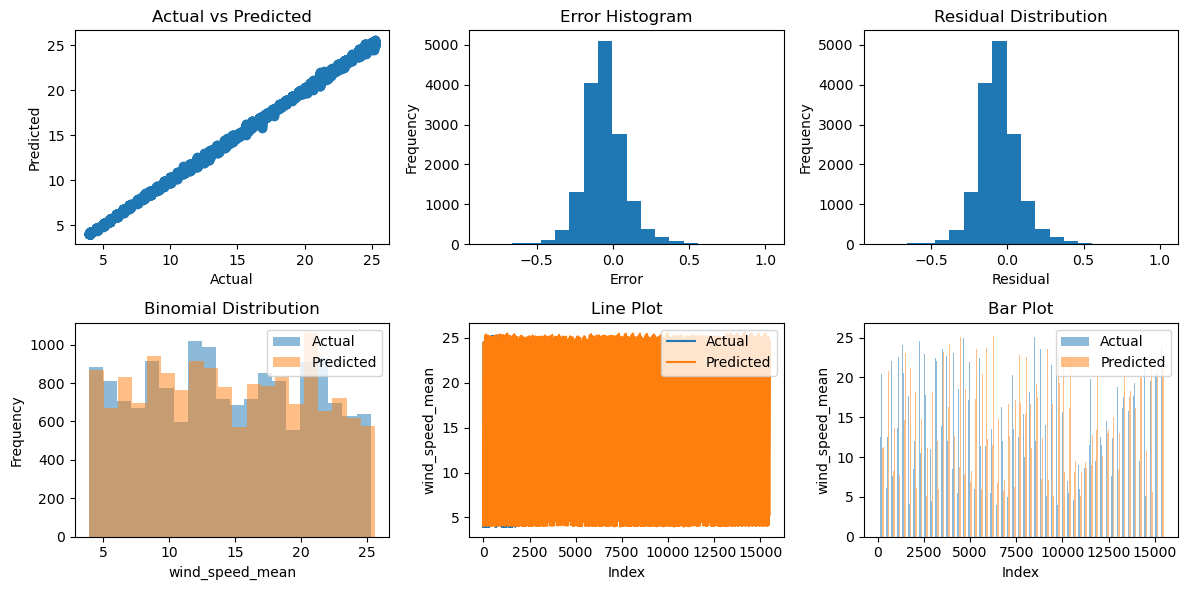

C:\Users\musab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Target Variable: yaw_error_mean
Training MAE: 2.689601095478121
Training MSE: 17.369654284956543
Training RMSE: 4.167691721439644
Training R2: 0.8759511420280266

Test MAE: 3.357280679800046
Test MSE: 25.31795698242927
Test RMSE: 5.031695239422721
Test R2: 0.8191805750887156



C:\Users\musab\AppData\Local\Temp\ipykernel_1832\1812753727.py:92: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


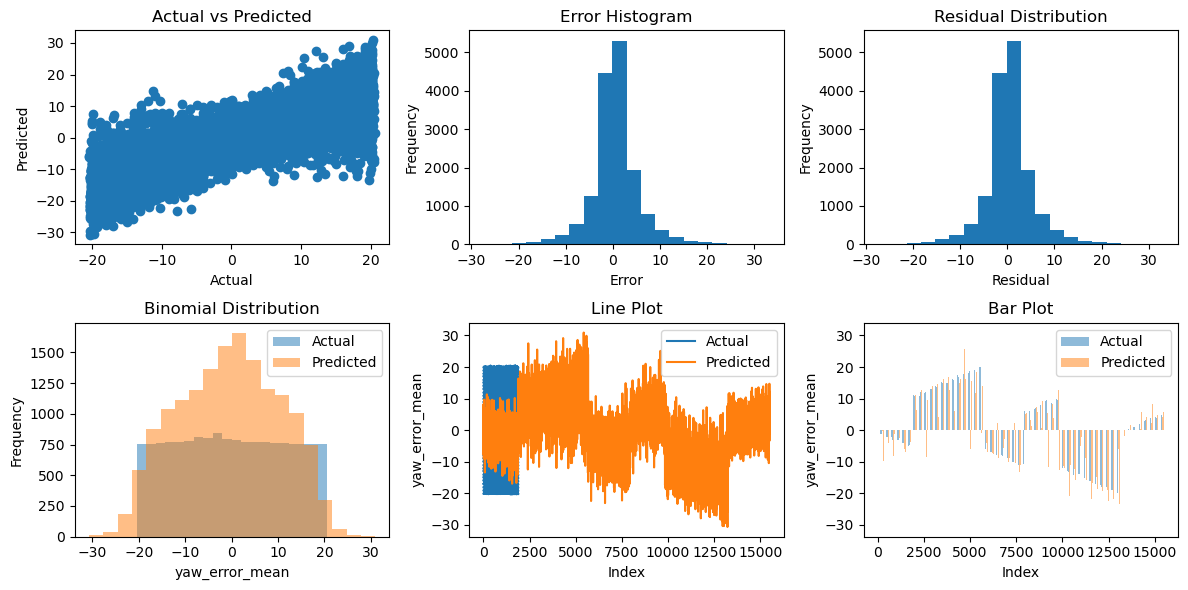

Target Variable: Turbulence
Training MAE: 0.0039668967233051685
Training MSE: 2.9482836071770725e-05
Training RMSE: 0.00542980994803416
Training R2: 0.9622308393267625

Test MAE: 0.004318267951323454
Test MSE: 3.561807385716412e-05
Test RMSE: 0.0059680879565539345
Test R2: 0.9523650279495394



C:\Users\musab\AppData\Local\Temp\ipykernel_1832\1812753727.py:92: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


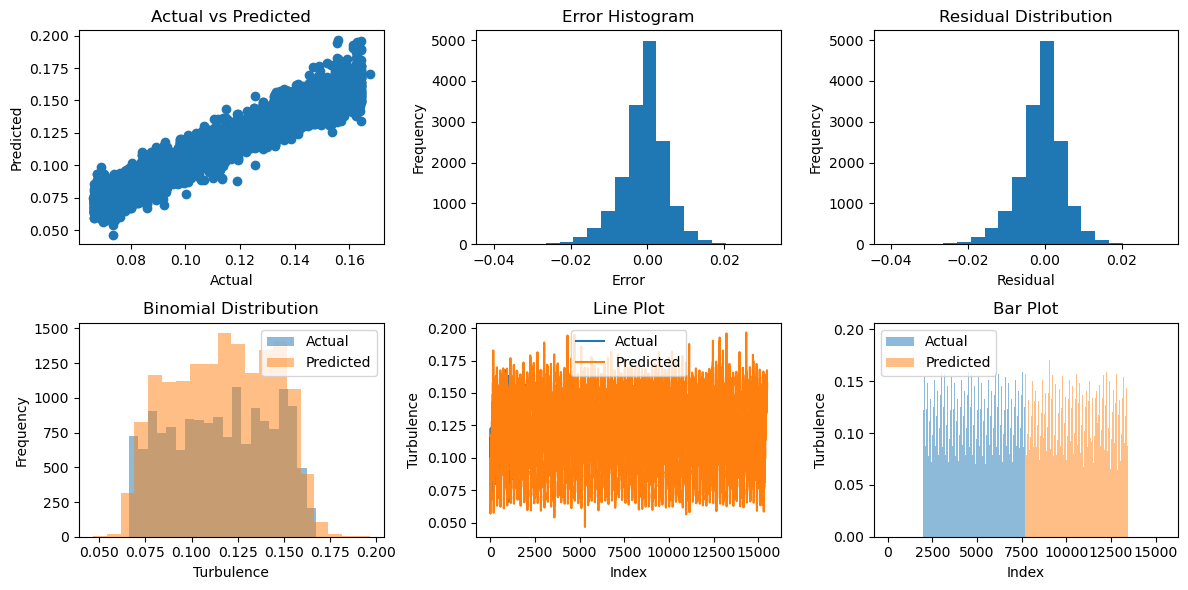

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

targets = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
    nn_model.fit(X_train_scaled, y_train)
    
    train_predictions = nn_model.predict(X_train_scaled)
    test_predictions = nn_model.predict(X_test_scaled)
    
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_predictions)
    
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_predictions)
    
    print("Target Variable:", target_variable)
    print("Training MAE:", train_mae)
    print("Training MSE:", train_mse)
    print("Training RMSE:", train_rmse)
    print("Training R2:", train_r2)
    print()
    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    print("Test RMSE:", test_rmse)
    print("Test R2:", test_r2)
    print()
    
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.scatter(y_test, test_predictions)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')

    plt.subplot(2, 3, 2)
    error = y_test - test_predictions
    plt.hist(error, bins=20)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title('Error Histogram')

    plt.subplot(2, 3, 3)
    residual = y_test - test_predictions
    plt.hist(residual, bins=20)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution')

    plt.subplot(2, 3, 4)
    plt.hist(y_test, bins=20, alpha=0.5, label='Actual')
    plt.hist(test_predictions, bins=20, alpha=0.5, label='Predicted')
    plt.xlabel(target_variable)
    plt.ylabel('Frequency')
    plt.title('Binomial Distribution')
    plt.legend()

    plt.subplot(2, 3, 5)
    plt.plot(y_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel(target_variable)
    plt.title('Line Plot')
    plt.legend()

    plt.subplot(2, 3, 6)
    index = np.arange(len(y_test))
    plt.bar(index, y_test, width=0.3, alpha=0.5, label='Actual')
    plt.bar(index + 0.3, test_predictions, width=0.3, alpha=0.5, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel(target_variable)
    plt.title('Bar Plot')
    plt.legend()

    plt.tight_layout()
    plt.show()


Target Variable: wind_speed_mean
Training MAE: 0.09858141881131388
Training MSE: 0.014868082793721852
Training RMSE: 0.12193474809799647
Training R2: 0.9996203591507143

Test MAE: 0.11402875755378633
Test MSE: 0.02151674322788479
Test RMSE: 0.14668586580814386
Test R2: 0.9994202274502403



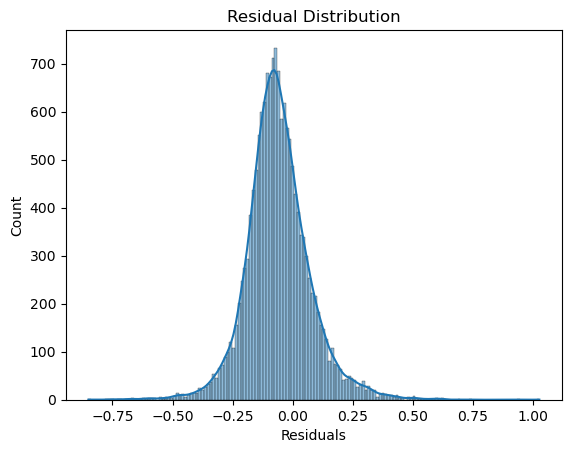

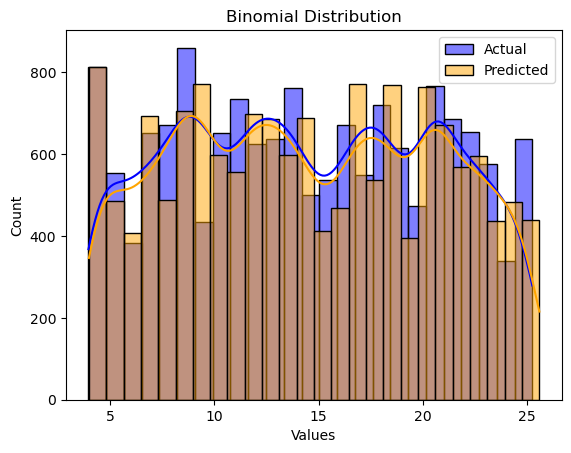

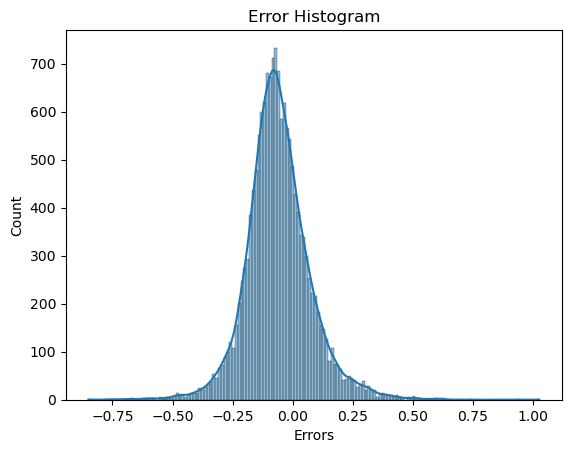

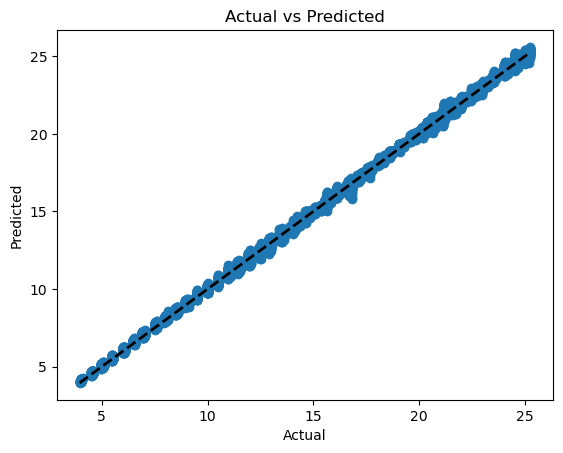

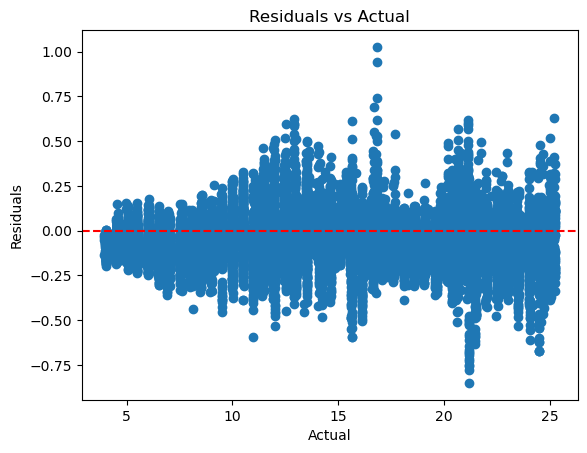

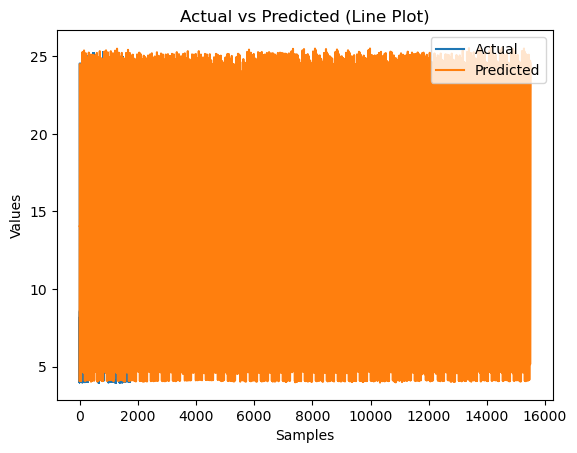

C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


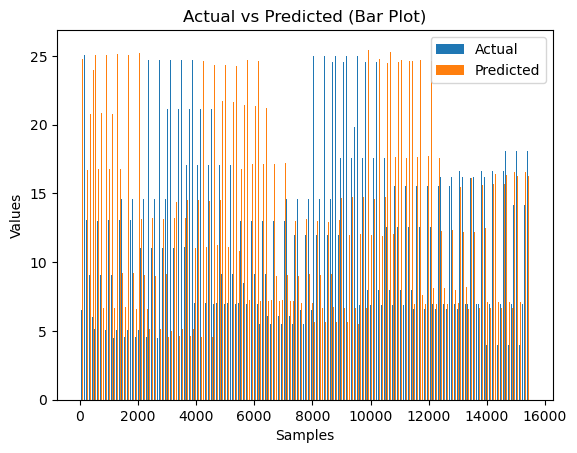

C:\Users\musab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Target Variable: yaw_error_mean
Training MAE: 2.689601095478121
Training MSE: 17.369654284956543
Training RMSE: 4.167691721439644
Training R2: 0.8759511420280266

Test MAE: 3.357280679800046
Test MSE: 25.31795698242927
Test RMSE: 5.031695239422721
Test R2: 0.8191805750887156



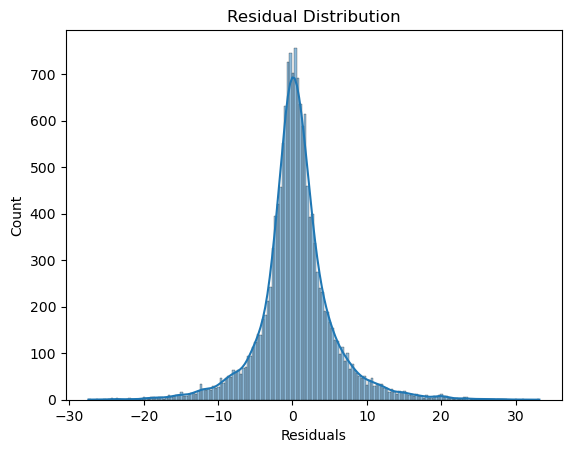

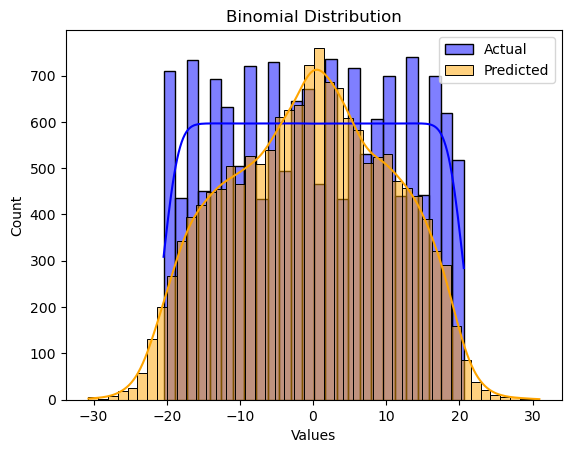

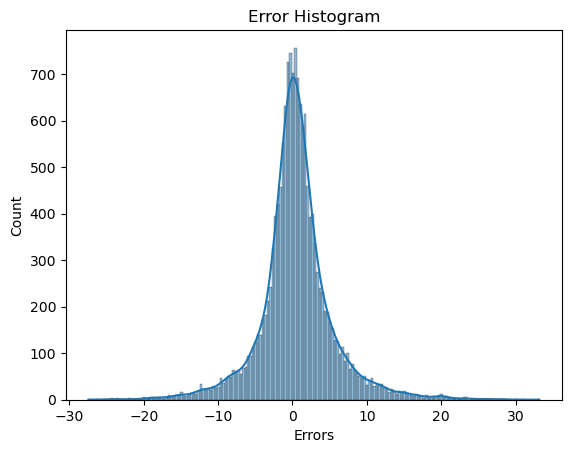

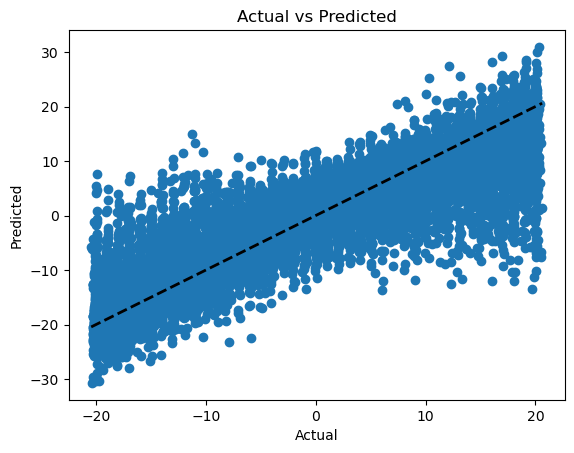

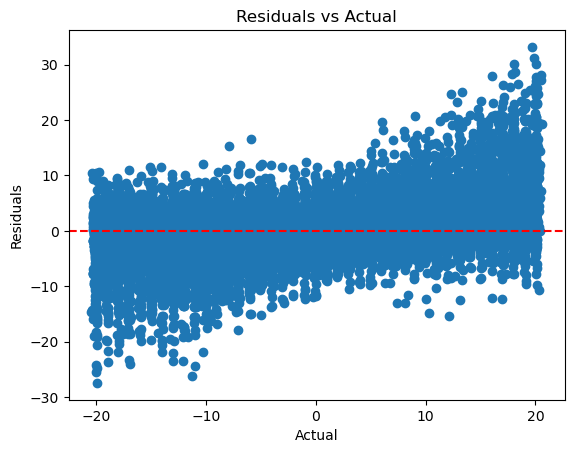

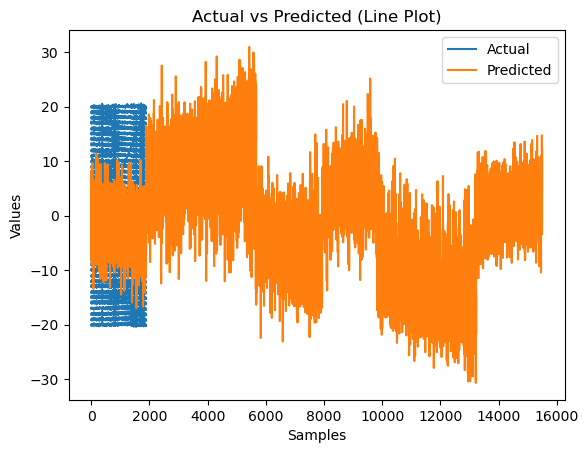

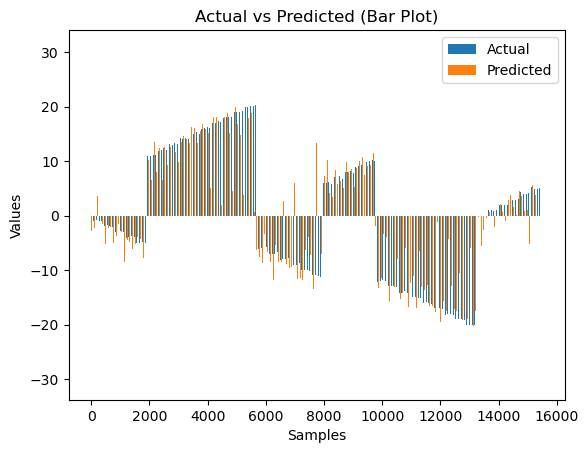

Target Variable: Turbulence
Training MAE: 0.0039668967233051685
Training MSE: 2.9482836071770725e-05
Training RMSE: 0.00542980994803416
Training R2: 0.9622308393267625

Test MAE: 0.004318267951323454
Test MSE: 3.561807385716412e-05
Test RMSE: 0.0059680879565539345
Test R2: 0.9523650279495394



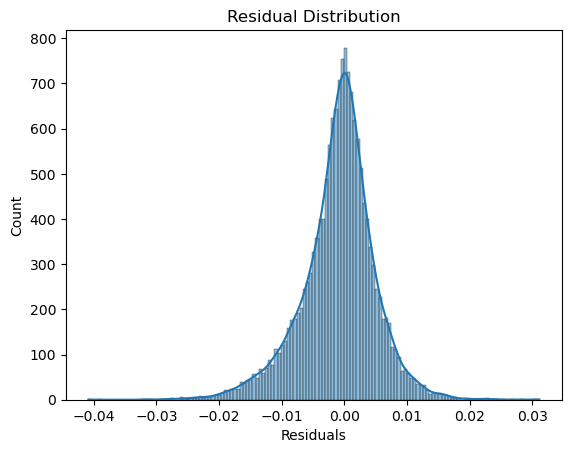

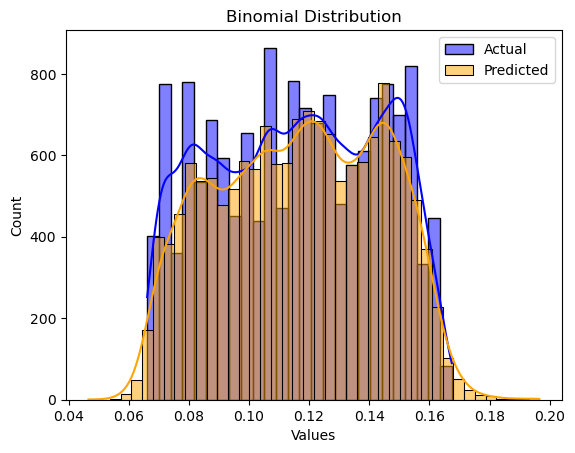

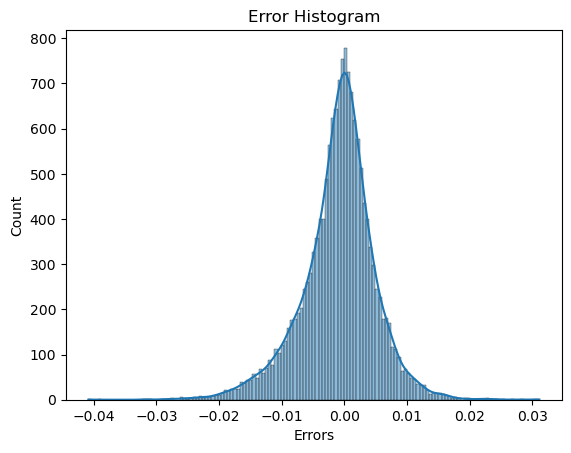

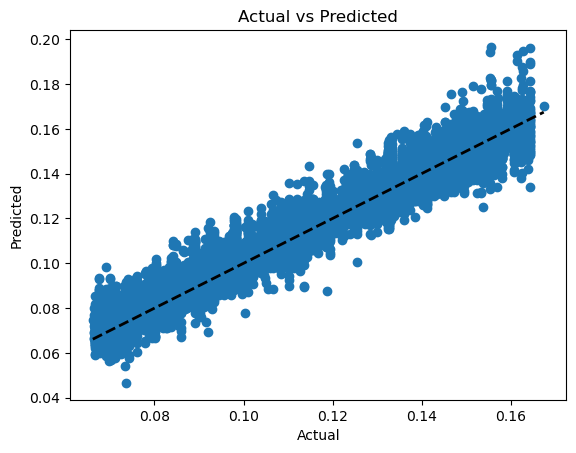

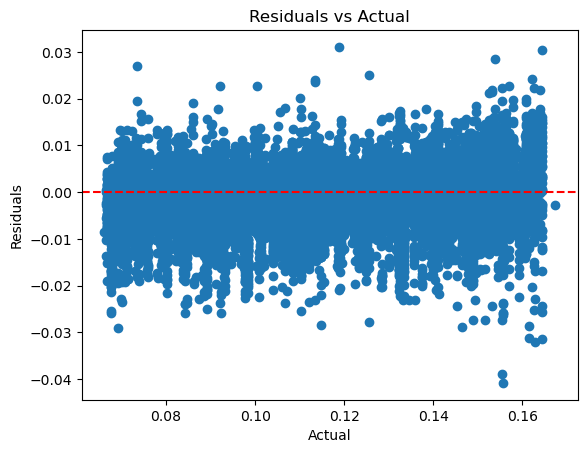

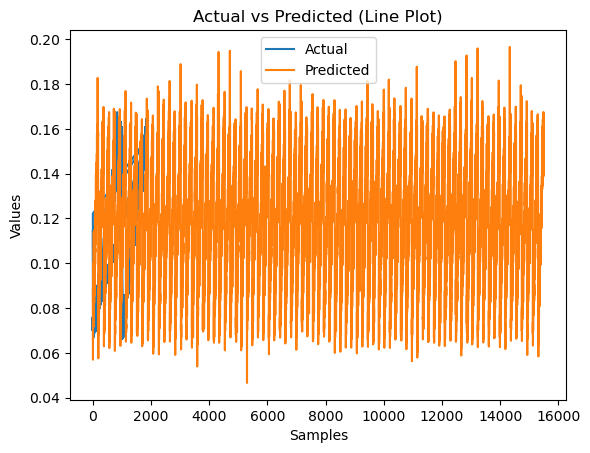

C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


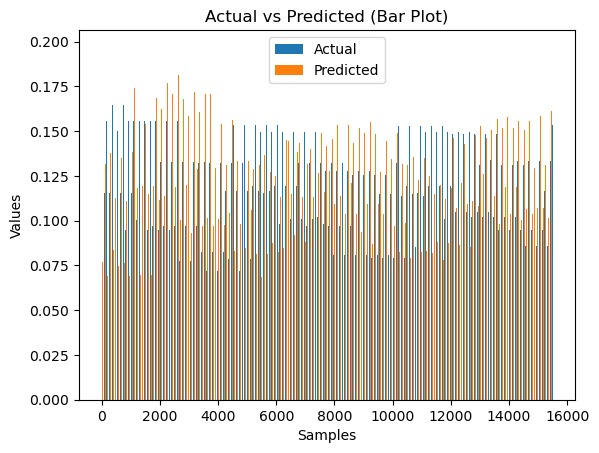

In [6]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
    nn_model.fit(X_train_scaled, y_train)
    
    train_predictions = nn_model.predict(X_train_scaled)
    test_predictions = nn_model.predict(X_test_scaled)
    
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_predictions)
    
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_predictions)
    
    print("Target Variable:", target_variable)
    print("Training MAE:", train_mae)
    print("Training MSE:", train_mse)
    print("Training RMSE:", train_rmse)
    print("Training R2:", train_r2)
    print()
    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    print("Test RMSE:", test_rmse)
    print("Test R2:", test_r2)
    print()
    
    
    residuals = y_test - test_predictions
    sns.histplot(residuals, kde=True)
    plt.title("Residual Distribution")
    plt.xlabel("Residuals")
    plt.show()

    sns.histplot(y_test, kde=True, color='blue', label='Actual')
    sns.histplot(test_predictions, kde=True, color='orange', label='Predicted')
    plt.title("Binomial Distribution")
    plt.xlabel("Values")
    plt.legend()
    plt.show()

    errors = y_test - test_predictions
    sns.histplot(errors, kde=True)
    plt.title("Error Histogram")
    plt.xlabel("Errors")
    plt.show()

    plt.scatter(y_test, test_predictions)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title("Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    plt.scatter(y_test, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Residuals vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Residuals")
    plt.show()

    plt.plot(y_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.title("Actual vs Predicted (Line Plot)")
    plt.xlabel("Samples")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

    plt.bar(np.arange(len(y_test)), y_test, width=0.35, label='Actual')
    plt.bar(np.arange(len(test_predictions)) + 0.35, test_predictions, width=0.35, label='Predicted')
    plt.title("Actual vs Predicted (Bar Plot)")
    plt.xlabel("Samples")
    plt.ylabel("Values")
    plt.legend()
    plt.show()


In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']

hidden_layer_sizes_list = [(100,), (100, 100), (100, 100, 100)]

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', random_state=42)
        nn_model.fit(X_train_scaled, y_train)
        
        train_predictions = nn_model.predict(X_train_scaled)
        test_predictions = nn_model.predict(X_test_scaled)
        
        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        
        print("Target Variable:", target_variable)
        print("Hidden Layer Sizes:", hidden_layer_sizes)
        print("Training MAE:", train_mae)
        print("Training MSE:", train_mse)
        print("Training RMSE:", train_rmse)
        print("Training R2:", train_r2)
        print()
        print("Test MAE:", test_mae)
        print("Test MSE:", test_mse)
        print("Test RMSE:", test_rmse)
        print("Test R2:", test_r2)
        print()


Target Variable: wind_speed_mean
Hidden Layer Sizes: (100,)
Training MAE: 0.11438003679388989
Training MSE: 0.023371869566859105
Training RMSE: 0.15287861056033675
Training R2: 0.9994032239035215

Test MAE: 0.13039444812192003
Test MSE: 0.031221143765681292
Test RMSE: 0.176695058690619
Test R2: 0.9991587406172145

Target Variable: wind_speed_mean
Hidden Layer Sizes: (100, 100)
Training MAE: 0.09858141881131388
Training MSE: 0.014868082793721852
Training RMSE: 0.12193474809799647
Training R2: 0.9996203591507143

Test MAE: 0.11402875755378633
Test MSE: 0.02151674322788479
Test RMSE: 0.14668586580814386
Test R2: 0.9994202274502403

Target Variable: wind_speed_mean
Hidden Layer Sizes: (100, 100, 100)
Training MAE: 0.07241808724155947
Training MSE: 0.008825950041348677
Training RMSE: 0.09394652756408124
Training R2: 0.9997746386527478

Test MAE: 0.0908025808692071
Test MSE: 0.01541033827261189
Test RMSE: 0.12413838355888114
Test R2: 0.9995847656395606



C:\Users\musab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Target Variable: yaw_error_mean
Hidden Layer Sizes: (100,)
Training MAE: 4.228623295169478
Training MSE: 36.474390054035545
Training RMSE: 6.039403120676376
Training R2: 0.7395108528241652

Test MAE: 4.682269324282305
Test MSE: 42.62858813378032
Test RMSE: 6.529057216304688
Test R2: 0.6955490209387911



C:\Users\musab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100)
Training MAE: 2.689601095478121
Training MSE: 17.369654284956543
Training RMSE: 4.167691721439644
Training R2: 0.8759511420280266

Test MAE: 3.357280679800046
Test MSE: 25.31795698242927
Test RMSE: 5.031695239422721
Test R2: 0.8191805750887156



C:\Users\musab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100)
Training MAE: 2.0003343922561525
Training MSE: 9.464028815848916
Training RMSE: 3.0763661706384884
Training R2: 0.9324107465145877

Test MAE: 2.7790745539209394
Test MSE: 19.18830647477386
Test RMSE: 4.3804459219095335
Test R2: 0.86295819428882

Target Variable: Turbulence
Hidden Layer Sizes: (100,)
Training MAE: 0.008968455619938524
Training MSE: 0.0001384012427859725
Training RMSE: 0.011764405755752072
Training R2: 0.8227002733578878

Test MAE: 0.00965884223101372
Test MSE: 0.00016074156489456938
Test RMSE: 0.012678389680656191
Test R2: 0.7850271190461908

Target Variable: Turbulence
Hidden Layer Sizes: (100, 100)
Training MAE: 0.0039668967233051685
Training MSE: 2.9482836071770725e-05
Training RMSE: 0.00542980994803416
Training R2: 0.9622308393267625

Test MAE: 0.004318267951323454
Test MSE: 3.561807385716412e-05
Test RMSE: 0.0059680879565539345
Test R2: 0.9523650279495394

Target Variable: Turbulence
Hidden Layer S

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['yaw_error_mean']

hidden_layer_sizes_list = [(100,), (100, 100), (100, 100, 100, 50),(100, 100, 100, 100),(100, 100, 100, 50,50)]

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', random_state=42)
        nn_model.fit(X_train_scaled, y_train)
        
        train_predictions = nn_model.predict(X_train_scaled)
        test_predictions = nn_model.predict(X_test_scaled)
        
        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        
        print("Target Variable:", target_variable)
        print("Hidden Layer Sizes:", hidden_layer_sizes)
        print("Training MAE:", train_mae)
        print("Training MSE:", train_mse)
        print("Training RMSE:", train_rmse)
        print("Training R2:", train_r2)
        print()
        print("Test MAE:", test_mae)
        print("Test MSE:", test_mse)
        print("Test RMSE:", test_rmse)
        print("Test R2:", test_r2)
        print()


C:\Users\musab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Target Variable: yaw_error_mean
Hidden Layer Sizes: (100,)
Training MAE: 4.228623295169478
Training MSE: 36.474390054035545
Training RMSE: 6.039403120676376
Training R2: 0.7395108528241652

Test MAE: 4.682269324282305
Test MSE: 42.62858813378032
Test RMSE: 6.529057216304688
Test R2: 0.6955490209387911



C:\Users\musab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100)
Training MAE: 2.689601095478121
Training MSE: 17.369654284956543
Training RMSE: 4.167691721439644
Training R2: 0.8759511420280266

Test MAE: 3.357280679800046
Test MSE: 25.31795698242927
Test RMSE: 5.031695239422721
Test R2: 0.8191805750887156



C:\Users\musab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 50)
Training MAE: 1.4435984774079944
Training MSE: 5.125541654947988
Training RMSE: 2.263965912938618
Training R2: 0.9633949197633287

Test MAE: 2.344117090380272
Test MSE: 15.571522425863881
Test RMSE: 3.9460768398326813
Test R2: 0.8887890625617251



C:\Users\musab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100)
Training MAE: 1.3752643438068806
Training MSE: 4.87381087872281
Training RMSE: 2.2076709172163342
Training R2: 0.9651927054184051

Test MAE: 2.3927080154602063
Test MSE: 16.070118376502037
Test RMSE: 4.008755215338303
Test R2: 0.8852281183228177

Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 50, 50)
Training MAE: 1.797061860120976
Training MSE: 8.992087655604287
Training RMSE: 2.9986809859677117
Training R2: 0.9357812086434176

Test MAE: 2.6221015558864553
Test MSE: 20.395968085249276
Test RMSE: 4.516189553733244
Test R2: 0.8543331429845165



The FNN model is initialized using MLPRegressor. In this example, the model has two hidden layers, each containing 100 units. The activation function used is Rectified Linear Unit (ReLU), and the solver used for weight optimization is Adam. The random_state parameter is set to 42 for reproducibility: